<a href="https://colab.research.google.com/github/A01706648/TC3006_ClassWork/blob/main/m1/w4_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install yfinance
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


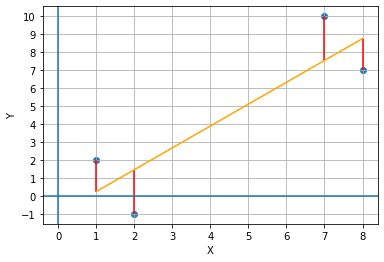

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data = {'x':  [1,2,7,8],
        'y': [2,-1,10,7]}
df = pd.DataFrame(data)
b1,b0 = np.polyfit(df.x,df.y,1)
df['yhat'] = b0 + b1*df['x']
#plt.clf()
plt.scatter(df.x,df.y)
plt.plot(df.x, df.yhat,c="orange")
plt.xticks(np.arange(-4,14,1))
plt.yticks(np.arange(-2,11,1))

for i in range(4):
  x=df.x.iloc[i]
  ymin= df.y.iloc[i]
  ymax=df.yhat.iloc[i]
  if (ymin>ymax):
    temp=ymax
    ymax=ymin
    ymin=temp
  plt.vlines(x=x,ymin=ymin,ymax=ymax,color='r')

plt.axhline(y=0)
plt.axvline(x=0)

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

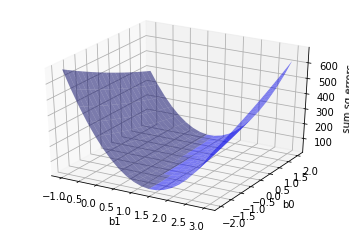

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
# I define a function to get the sum of squared errors given a specific b0 and b1 coefficients:
def sumsqerrors2(b1, b0,df):
    return sum( ( df.y - (b0+b1*df.x)) **2)
# Note that df is a dataframe, so this line of code performs a row-wise operation to avoid 
#   writing a loop to sum each squared error for each observation

# Create the plot:
fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')
# I create 20 possible values of beta0 and beta1:
# beta1 will move between -1 and 3
b1s = np.linspace(-1, 3.0, 20)
# beta0 will move between -2 and 2:
b0s = np.linspace(-2, 2, 20)
# I create a grid with all possible combinations of beta0 and beta1 using the meshgrid function:
# M will be all the b1s values, and B the beta0 values:
M, B = np.meshgrid(b1s, b0s)
# I calculate the sum of squared errors with all possible pairs of beta0 and beta1 of the previous grid:
zs = np.array([sumsqerrors2(mp, bp, df) 
        for mp, bp in zip(np.ravel(M), np.ravel(B))])
# I reshape the zs (squared errors) from a vector to a grid of the same size as M (20x20)
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('b1')
ax.set_ylabel('b0')
ax.set_zlabel('sum sq.errors')

plt.show()

In [13]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf

# Getting price data and selecting adjusted price columns:
sprices = yf.download(tickers=['ALFAA.MX','^MXX'],start="2018-01-01", end="2022-07-31",interval="1mo")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAA.MX','MXX']

[*********************100%***********************]  2 of 2 completed


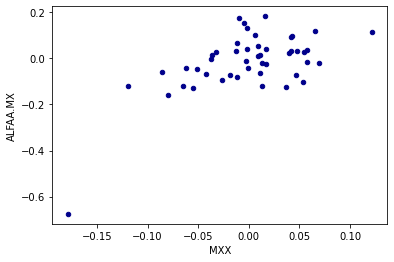

In [14]:
sr.plot.scatter(x='MXX', y='ALFAA.MX',c='DarkBlue')
plt.show()

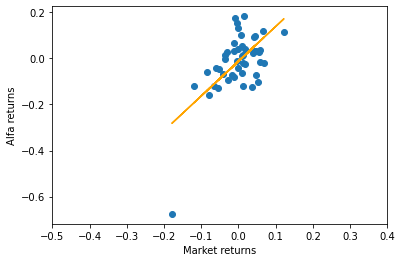

In [16]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!! 
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values 
plt.clf()
x=sr['MXX']
y = sr['ALFAA.MX']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


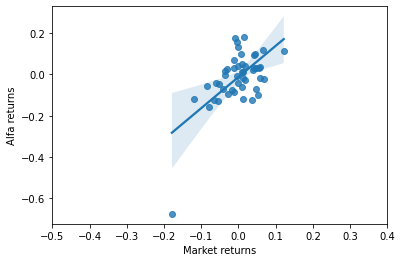

In [17]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()

sns.regplot(x, y)
plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

In [18]:
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()
 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAA.MX   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     27.74
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.77e-06
Time:                        18:41:53   Log-Likelihood:                 40.840
No. Observations:                  47   AIC:                            -77.68
Df Residuals:                      45   BIC:                            -73.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0122      0.015     -0.809      0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
import statsmodels.formula.api as smf

sr['ALFAA'] = sr['ALFAA.MX']
mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()
 
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     27.74
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.77e-06
Time:                        18:48:19   Log-Likelihood:                 40.840
No. Observations:                  47   AIC:                            -77.68
Df Residuals:                      45   BIC:                            -73.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0122      0.015     -0.809      0.4

In [27]:
# Using matrix algebra to estimate the beta coefficients:
sr['constant'] = 1
selcols = ['constant','MXX']
x = sr[selcols].values
y = sr['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.01223359,  1.50741662])